# **EXPLORATORY DATA ANALYSIS ON CARS DATASET**
### **Analysis Goals**

**Descriptive Analysis:** Summarize the dataset to understand the distribution of various features such as year of manufacture, kilometers driven, fuel type, transmission, owner type, and seating capacity.

**Data Cleaning and Quality Assessment:**
Identify and address missing values, outliers, and inconsistencies in the dataset to ensure reliable analysis.

**Price Determinants:**
Analyze how features like Location, Year, Fuel_Type,Transmission, Owner_Type, Seats, Brand, Model, Car_Age, and Year influence car prices.

**Market Trends:**
Discover patterns in car preferences, such as popular brands, model, and pricing trends over time or regions.

**Depreciation and Car Age:**
Investigate how car value decreases with age and identify brands or models with the best resale value.

**Fuel Efficiency:**
Explore factors impacting mileage and fuel efficiency, comparing cars based on FuelType, EngineSize, and other relevant features.

**Feature Correlations:**
Analyze relationships among features to understand dependencies and identify significant predictors for price.

### **Step 1: Importing Libraries**

To start any machine learning project, it's essential to import the necessary libraries for data analysis, transformation, and visualization. Below are the libraries we'll use and their purposes:

- **Pandas:** Used for loading, manipulating, and analyzing data, such as handling missing values, grouping, and merging datasets.
- **Numpy:** Provides support for numerical computations, including array operations and mathematical functions.
- **Matplotlib:** A versatile library for creating static, interactive, and publication-quality plots and visualizations.
- **Seaborn:** Built on Matplotlib, it offers an easier and more attractive way to create advanced visualizations, such as heatmaps and pair plots.
These libraries help in efficiently loading data, performing statistical calculations, and gaining insights through compelling visual representations.

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import warnings
warnings.filterwarnings('ignore')

### **Step 2: Loading the Dataset**

Pandas provides extensive functionality to load data from various file formats such as CSV, Excel, JSON, SQL, and more. These tools make it simple to convert raw data into a structured pandas DataFrame for analysis.

In most cases, datasets are available as CSV files due to their simplicity and compatibility. The `read_csv()` method is commonly used to load such files into a DataFrame.

In this example, we’ll work with a dataset designed to predict the price of used cars. The aim is to examine the dataset and perform EDA to uncover the factors that impact resale prices. The dataset has been loaded into a pandas DataFrame named `df`.

In [6]:
df = pd.read_csv(r"Car.csv")

**Analyzing the Data**

Before drawing any conclusions, it's essential to familiarize ourselves with the dataset by reviewing all of its variables.

The primary goal of this step is to gain an overall understanding of the data, including details such as the number of rows and columns, the values within the dataset, the data types of each feature, and the presence of any missing values.

Shape: The .shape attribute will show the number of rows (observations) and columns (features) in the dataset.
This dataset contains 7253 rows and 14 columns.

The .head() function displays the first 5 rows by default, providing a snapshot of the dataset's structure and content.

In [8]:
df.shape

(7253, 14)

In [9]:
df.head(8)

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74
5,5,Hyundai EON LPG Era Plus Option,Hyderabad,2012,75000,LPG,Manual,First,21.1 km/kg,814 CC,55.2 bhp,5.0,NaN,2.35
6,6,Nissan Micra Diesel XV,Jaipur,2013,86999,Diesel,Manual,First,23.08 kmpl,1461 CC,63.1 bhp,5.0,NaN,3.50
7,7,Toyota Innova Crysta 2.8 GX AT 8S,Mumbai,2016,36000,Diesel,Automatic,First,11.36 kmpl,2755 CC,171.5 bhp,8.0,21 Lakh,17.50


- .tail() will display the last 5 observations of the dataset

In [11]:
df.tail()

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
7248,7248,Volkswagen Vento Diesel Trendline,Hyderabad,2011,89411,Diesel,Manual,First,20.54 kmpl,1598 CC,103.6 bhp,5.0,NaN,NaN
7249,7249,Volkswagen Polo GT TSI,Mumbai,2015,59000,Petrol,Automatic,First,17.21 kmpl,1197 CC,103.6 bhp,5.0,NaN,NaN
7250,7250,Nissan Micra Diesel XV,Kolkata,2012,28000,Diesel,Manual,First,23.08 kmpl,1461 CC,63.1 bhp,5.0,NaN,NaN
7251,7251,Volkswagen Polo GT TSI,Pune,2013,52262,Petrol,Automatic,Third,17.2 kmpl,1197 CC,103.6 bhp,5.0,NaN,NaN
7252,7252,Mercedes-Benz E-Class 2009-2013 E 220 CDI Avan...,Kochi,2014,72443,Diesel,Automatic,First,10.0 kmpl,2148 CC,170 bhp,5.0,NaN,NaN


The **.describe()** function in pandas provides a quick statistical summary of the numerical columns in a dataset. It helps to understand the distribution and key statistics of the data.
Key statistics displayed by .describe():
- Count: The number of non-null values in each column.
- Mean: The average value of each column.
- Standard Deviation: A measure of the spread of the data.
- Min: The minimum value in each column.
- 25th Percentile (Q1): The value below which 25% of the data falls.
- 50th Percentile (Median or Q2): The middle value, where 50% of the data is below and 50% is above.
- 75th Percentile (Q3): The value below which 75% of the data falls.
- Max: The maximum value in each column.

In [13]:
df.describe()

,S.No.,Year,Kilometers_Driven,Seats,Price
count,7253.000000,7253.000000,7.253000e+03,7200.000000,6019.000000
mean,3626.000000,2013.365366,5.869906e+04,5.279722,9.479468
std,2093.905084,3.254421,8.442772e+04,0.811660,11.187917
min,0.000000,1996.000000,1.710000e+02,0.000000,0.440000
25%,1813.000000,2011.000000,3.400000e+04,5.000000,3.500000
50%,3626.000000,2014.000000,5.341600e+04,5.000000,5.640000
75%,5439.000000,2016.000000,7.300000e+04,5.000000,9.950000
max,7252.000000,2019.000000,6.500000e+06,10.000000,160.000000


**info()** helps to understand the data type and information about data, including the number of records in each column, data having null or not null, Data type, the memory usage of the dataset

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S.No.              7253 non-null   int64  
 1   Name               7253 non-null   object 
 2   Location           7253 non-null   object 
 3   Year               7253 non-null   int64  
 4   Kilometers_Driven  7253 non-null   int64  
 5   Fuel_Type          7253 non-null   object 
 6   Transmission       7253 non-null   object 
 7   Owner_Type         7253 non-null   object 
 8   Mileage            7251 non-null   object 
 9   Engine             7207 non-null   object 
 10  Power              7207 non-null   object 
 11  Seats              7200 non-null   float64
 12  New_Price          1006 non-null   object 
 13  Price              6019 non-null   float64
dtypes: float64(2), int64(3), object(9)
memory usage: 793.4+ KB


The **.nunique()** method in pandas returns the count of unique values for each column. It's useful for understanding the diversity of values in both categorical and numerical data.

In [17]:
df.nunique()

S.No.                7253
Name                 2041
Location               11
Year                   23
Kilometers_Driven    3660
Fuel_Type               5
Transmission            2
Owner_Type              4
Mileage               450
Engine                150
Power                 386
Seats                   9
New_Price             625
Price                1373
dtype: int64

In [18]:
df['Owner_Type'].unique()


array(['First', 'Second', 'Fourth & Above', 'Third'], dtype=object)

In [19]:
df['Seats'].unique()

array([ 5.,  7.,  8.,  4.,  6.,  2., nan, 10.,  9.,  0.])

### **Step 3: Missing Values Calculation**

The **.isnull()** method in pandas is commonly used in data preprocessing to identify missing or null values in the dataset. 

In this case, **df.isnull().sum()** helps by counting the number of missing values in each column, allowing us to see which features need attention.

In [21]:
df.isna().sum()

S.No.                   0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 46
Power                  46
Seats                  53
New_Price            6247
Price                1234
dtype: int64

In [22]:
(df.isnull().sum()/(len(df)))*100

S.No.                 0.000000
Name                  0.000000
Location              0.000000
Year                  0.000000
Kilometers_Driven     0.000000
Fuel_Type             0.000000
Transmission          0.000000
Owner_Type            0.000000
Mileage               0.027575
Engine                0.634220
Power                 0.634220
Seats                 0.730732
New_Price            86.129877
Price                17.013650
dtype: float64

The **New_Price** and **Price** columns exhibit a high percentage of missing data, with **New_Price** having around 86% missing values and **Price** containing approximately 17% missing values. This significant missing data could impact the quality of analysis and might require appropriate handling, such as imputation or removal, depending on the context.

### **Step 3: Data Reduction**

Data reduction involves eliminating features that do not contribute meaningfully to the analysis or predictive modeling. In some cases, certain columns may hold no value for the analysis, especially if they don't provide relevant information or help predict the target variable.

For example, the **S.No** column in this dataset contains only unique ID numbers for each entry. Since these IDs do not carry any predictive power or contribute to understanding the relationship between features and the target variable (car prices, in this case), they can be safely removed from the dataset to streamline the analysis and improve model performance.

In [24]:
#remove S.No ans new price colums from the data because they don't hold any informative data
df.drop(['S.No.', 'New_Price'], axis = 1, inplace=True)
df.columns

Index(['Name', 'Location', 'Year', 'Kilometers_Driven', 'Fuel_Type',
       'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats',
       'Price'],
      dtype='object')

In [25]:
#Impute price column with median
df['Price'].fillna(df['Price'].median(), inplace=True)

In [26]:
#As these columns contain less number of null values those values can be directly removed
df.dropna(subset=['Seats','Mileage'], inplace=True)

In [27]:
#to check is there any null values left
df.isnull().sum()

Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
Price                0
dtype: int64

**Checking for duplicate values**

In [29]:
df.duplicated().sum()

1

In [30]:
df[df.duplicated()]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
6582,Honda City 1.5 E MT,Mumbai,2010,52000,Petrol,Manual,First,17.0 kmpl,1497 CC,118 bhp,5.0,5.64


In [31]:
df.drop_duplicates(inplace=True)

In [32]:
df.duplicated().sum()

0

### **Step 4: Feature Constructing**

Feature engineering involves using domain knowledge to select, modify, or create new variables from raw data, with the goal of enhancing the performance of machine learning models. This process helps transform raw data into meaningful features that are more useful for predictive modeling.



**Data manipulation** refers to modifying or transforming data to make it easier to analyze, interpret, or use in applications like machine learning, reporting, or visualization. 
Common examples include:
- Splitting, merging, or aggregating data.
- Filtering or replacing values.
- Creating new columns or features.

The **Name** column, which contains the full names of cars, is unlikely to be a significant predictor of price in its current form. However, we can process this column to extract useful insights by breaking it down into key components. By splitting the **Name** column, we can derive two new variables: **"Brand"**, which identifies the manufacturer, and **"Model"**, which specifies the car's specific version. These new features may offer better predictive power for understanding car prices.

In [35]:
df.dtypes

Name                  object
Location              object
Year                   int64
Kilometers_Driven      int64
Fuel_Type             object
Transmission          object
Owner_Type            object
Mileage               object
Engine                object
Power                 object
Seats                float64
Price                float64
dtype: object

In [36]:
# Split the 'Power' column into two separate columns(Quantity and unit)
df[['Power (bhp)', 'Unit']] = df['Power'].str.split(' ', expand=True)
df.replace({'Power (bhp)':{'null': '0'}}, inplace=True)
df['Power (bhp)'] = df['Power (bhp)'].astype('float')

In [37]:
#Same with Engine
df[['Engine (CC)', 'Unit']] = df['Engine'].str.split(' ', expand=True)
df['Engine (CC)'] = df['Engine (CC)'].astype('int')

In [38]:
#Same with Mileage
df[['Mileage (Kmpl)', 'Unit']] = df['Mileage'].str.split(' ', expand=True)
df['Mileage (Kmpl)'] = df['Mileage (Kmpl)'].astype('float')

In [39]:
df['Brand'] = df.Name.str.split().str.get(0)
df['Model'] = df.Name.str.split().str.get(1) + ' ' + df.Name.str.split().str.get(2)+ ' ' + df.Name.str.split().str.get(3)
df[['Name','Brand','Model']]

,Name,Brand,Model
0,Maruti Wagon R LXI CNG,Maruti,Wagon R LXI
1,Hyundai Creta 1.6 CRDi SX Option,Hyundai,Creta 1.6 CRDi
2,Honda Jazz V,Honda,NaN
3,Maruti Ertiga VDI,Maruti,NaN
4,Audi A4 New 2.0 TDI Multitronic,Audi,A4 New 2.0
...,...,...,...
7248,Volkswagen Vento Diesel Trendline,Volkswagen,Vento Diesel Trendline
7249,Volkswagen Polo GT TSI,Volkswagen,Polo GT TSI
7250,Nissan Micra Diesel XV,Nissan,Micra Diesel XV
7251,Volkswagen Polo GT TSI,Volkswagen,Polo GT TSI


In [40]:
df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Power (bhp),Unit,Engine (CC),Mileage (Kmpl),Brand,Model
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75,58.16,km/kg,998,26.60,Maruti,Wagon R LXI
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50,126.20,kmpl,1582,19.67,Hyundai,Creta 1.6 CRDi
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50,88.70,kmpl,1199,18.20,Honda,NaN
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00,88.76,kmpl,1248,20.77,Maruti,NaN
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74,140.80,kmpl,1968,15.20,Audi,A4 New 2.0


In [41]:
df['Brand'].unique()

array(['Maruti', 'Hyundai', 'Honda', 'Audi', 'Nissan', 'Toyota',
       'Volkswagen', 'Tata', 'Land', 'Mitsubishi', 'Renault',
       'Mercedes-Benz', 'BMW', 'Mahindra', 'Ford', 'Porsche', 'Datsun',
       'Jaguar', 'Volvo', 'Chevrolet', 'Skoda', 'Mini', 'Fiat', 'Jeep',
       'Smart', 'Ambassador', 'Isuzu', 'ISUZU', 'Force', 'Bentley',
       'Lamborghini', 'Hindustan', 'OpelCorsa'], dtype=object)

Since there are some brand names which has apperared twice or ther is no brand like land and mini, therfore we have to replace them with their proper names.

In [43]:
df['Brand'] = df['Brand'].replace({"Mini":"Mini Cooper", "Land":"Land Rover", "ISUZU":"Isuzu"})

In [44]:
df['Brand'].unique()

array(['Maruti', 'Hyundai', 'Honda', 'Audi', 'Nissan', 'Toyota',
       'Volkswagen', 'Tata', 'Land Rover', 'Mitsubishi', 'Renault',
       'Mercedes-Benz', 'BMW', 'Mahindra', 'Ford', 'Porsche', 'Datsun',
       'Jaguar', 'Volvo', 'Chevrolet', 'Skoda', 'Mini Cooper', 'Fiat',
       'Jeep', 'Smart', 'Ambassador', 'Isuzu', 'Force', 'Bentley',
       'Lamborghini', 'Hindustan', 'OpelCorsa'], dtype=object)

In [45]:
model_unique = df['Model'].nunique()
model_unique

1121

There are 1121 unique models, it is a mixture of both upper case and lower case. So there might be some model names wich has apperared twice or more (in lower case or upper case) this might create a confusion with the same model, so converting all of them into lower case can over come this confusion.

In [47]:
df['Model'] = df['Model'].str.lower()

In [48]:
df['Model'].nunique()

1097

1121 model has been reduced into 1097 model names.

### **Creating New Features**

In this step, we’ll focus on the **Year** column. The **Year** column indicates the manufacturing year of the car, but it doesn’t directly provide the car's age, which is an important factor in determining its resale value.

To make the car's age more accessible, we can create a new column called **"Car_Age"**, which will represent the difference between the current year and the car’s manufacturing year. This transformation makes it easier to assess the car’s age as a feature that can influence its price.

In [50]:
import datetime
Year = datetime.datetime.now()
Year.year

2024

In [51]:
df['Car_Age'] = Year.year - df['Year']

In [52]:
df.drop(columns=['Mileage', 'Engine', 'Power', "Unit"], axis=1, inplace=True)

In [53]:
df.columns

Index(['Name', 'Location', 'Year', 'Kilometers_Driven', 'Fuel_Type',
       'Transmission', 'Owner_Type', 'Seats', 'Price', 'Power (bhp)',
       'Engine (CC)', 'Mileage (Kmpl)', 'Brand', 'Model', 'Car_Age'],
      dtype='object')

In [54]:
df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Seats,Price,Power (bhp),Engine (CC),Mileage (Kmpl),Brand,Model,Car_Age
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,5.0,1.75,58.16,998,26.60,Maruti,wagon r lxi,14
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,5.0,12.50,126.20,1582,19.67,Hyundai,creta 1.6 crdi,9
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,5.0,4.50,88.70,1199,18.20,Honda,NaN,13
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,7.0,6.00,88.76,1248,20.77,Maruti,NaN,12
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,5.0,17.74,140.80,1968,15.20,Audi,a4 new 2.0,11


Separating numerical and categorical columns ensures clearer and more effective visualizations, as they require different techniques. Numerical data (e.g., price, mileage) is best analyzed with histograms or scatter plots, while categorical data (e.g., brand, fuel type) works well with bar or pie charts. This separation helps uncover meaningful patterns and avoids confusion in interpretation.

In [56]:
df.dtypes


Name                  object
Location              object
Year                   int64
Kilometers_Driven      int64
Fuel_Type             object
Transmission          object
Owner_Type            object
Seats                float64
Price                float64
Power (bhp)          float64
Engine (CC)            int32
Mileage (Kmpl)       float64
Brand                 object
Model                 object
Car_Age                int64
dtype: object

In [57]:
cat_cols=df.select_dtypes(include=['object']).columns.tolist()
num_cols = df.select_dtypes(include=np.number).columns.tolist()
print("Categorical Variables:")
print(cat_cols)
print("Numerical Variables:")
print(num_cols)

Categorical Variables:
['Name', 'Location', 'Fuel_Type', 'Transmission', 'Owner_Type', 'Brand', 'Model']
Numerical Variables:
['Year', 'Kilometers_Driven', 'Seats', 'Price', 'Power (bhp)', 'Engine (CC)', 'Mileage (Kmpl)', 'Car_Age']


### **Step 5: Data Visualization**
Visualizing data is a crucial step in understanding it, requiring careful selection of appropriate charts for better insights. In this example, we use Matplotlib and Seaborn for data visualization.

- Matplotlib: A versatile 2D plotting library in Python, ideal for creating fundamental charts and graphs.
- Seaborn: A Python library built on top of Matplotlib, designed for easy creation and styling of statistical plots using Pandas and Numpy data structures.
#### **Step 5A: Univariate Analysis**

- Univariate analysis focuses on examining a single variable to understand its distribution, central tendency, and spread.  
- For numerical data, it uses descriptive statistics (e.g., mean, median) and visualizations like histograms or box plots.  
- Categorical data is analyzed using frequency distributions and visualizations such as bar or pie charts.  
- It helps identify patterns, outliers, and missing values, and guides data transformations if needed. The purpose is to simplify data exploration and provide key insights about the variable’s properties. It is a crucial first step for ensuring data quality and preparing for deeper analysis.  

Year


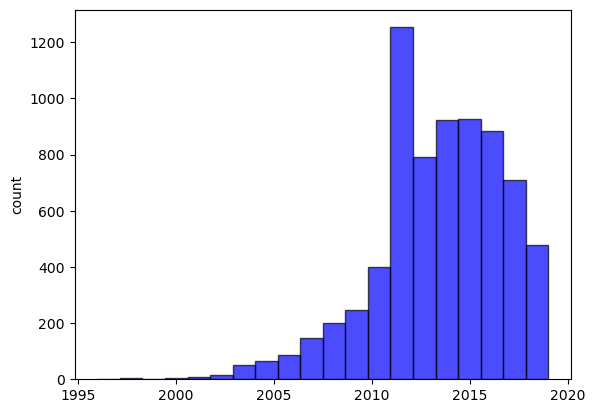

Kilometers_Driven


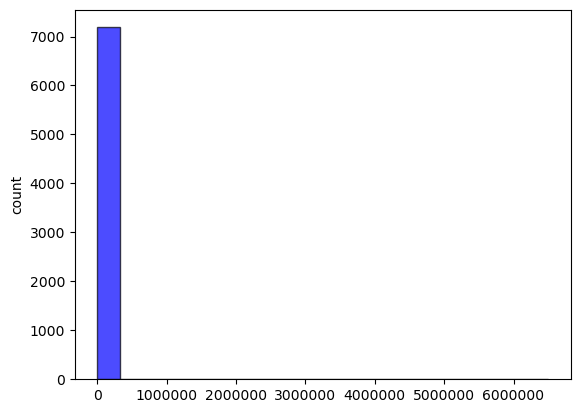

Seats


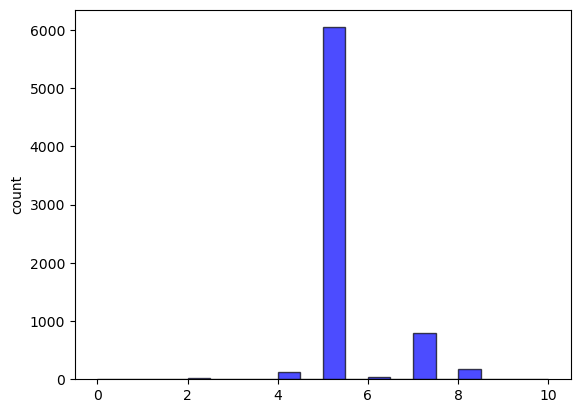

Price


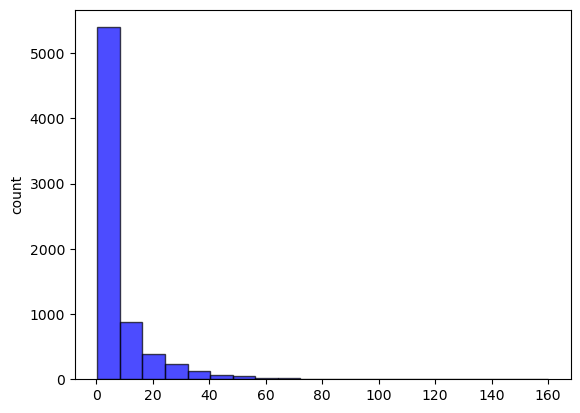

Power (bhp)


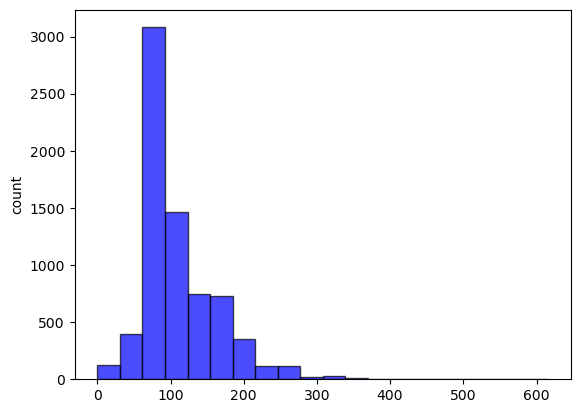

Engine (CC)


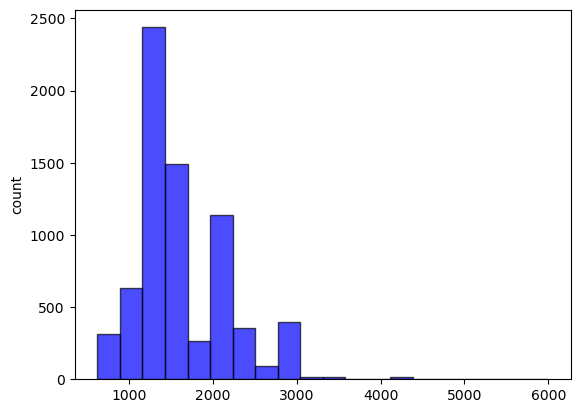

Mileage (Kmpl)


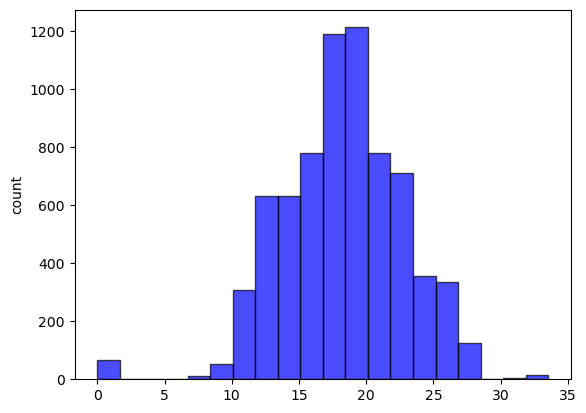

Car_Age


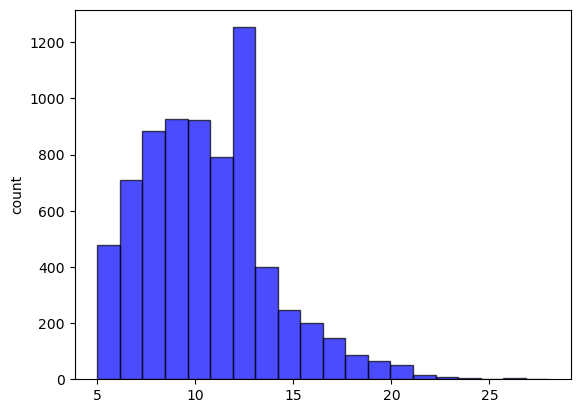

In [59]:
#UNIVARIATE ANALYSIS - Histogram
for col in num_cols:
    print(col)
    plt.subplot(1, 1, 1)
    df[col].hist(grid=False, bins=20, edgecolor='black', alpha=0.7, color='blue')
    plt.ticklabel_format(style='plain',axis='x')
    plt.ylabel('count')
    plt.show()

### **Observations**
- In the year 2010 to 2015 highest number of cars were manufactured and from the year 1995 to 2005 least number of cars were manufactured.
- All cars are in between 0 to 1000000 kilometer driven. 
- Most cars have 4 to 6 seater followed by 6 to 8 seater.
- 5000+ cars are in the range of 0 to 20 lakhs price range and around 10000 of them are in price range of 20 to 40 lakhs.
- 3000+ cars have power of 0 to 100 bhp followed by 1500 of them in the range of 100 to 200.
- 2000 cars have highest engine capacity around 1000 CC and more.
- Around 1200 and more cars have mileage range of 15 to 20 kmpl followed by 20 to 25 kmpl and 15 to 20 kmpl.
- There are more cars at the age of 10 to 15 years followed by 5 to 10 years and the least number of cars are at the age of 25+ years.

Name


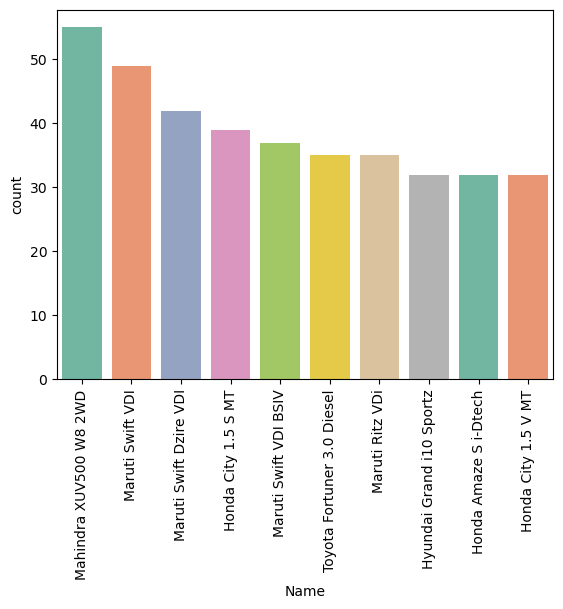

Location


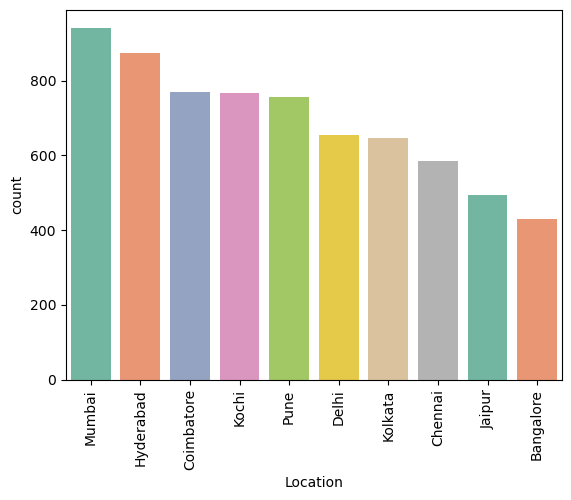

Fuel_Type


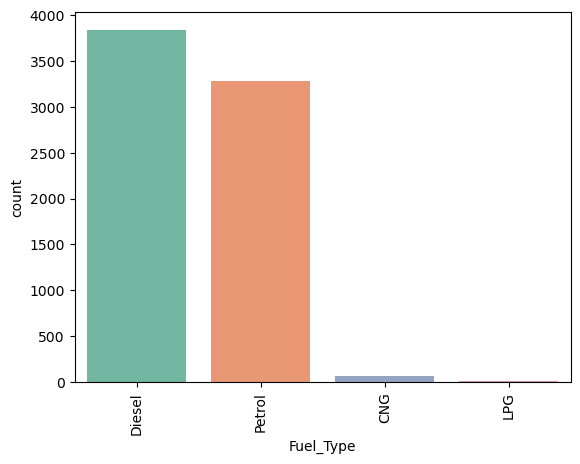

Transmission


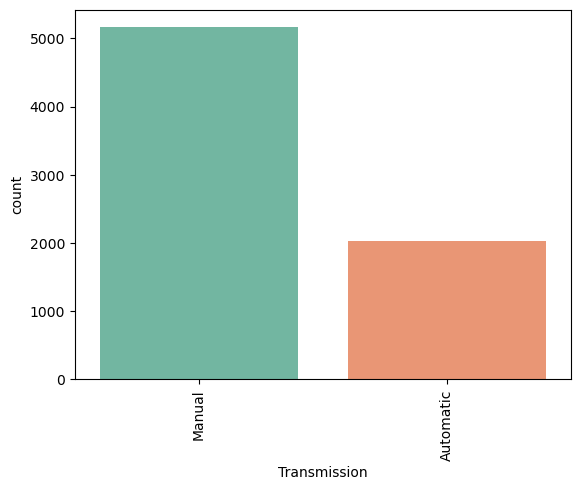

Owner_Type


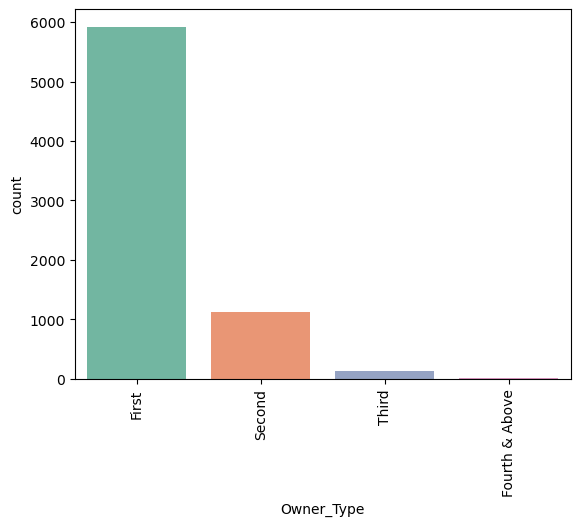

Brand


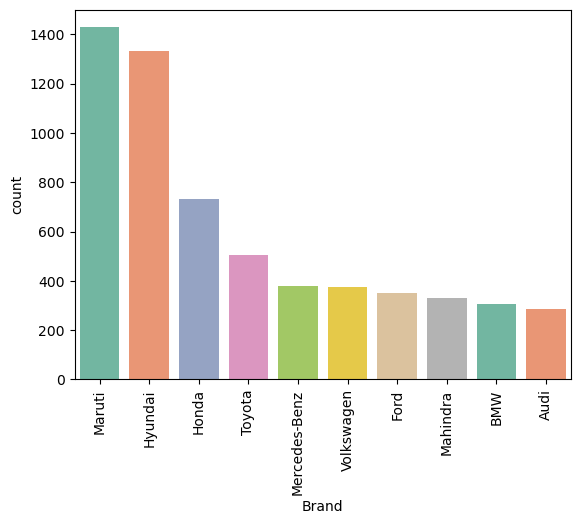

Model


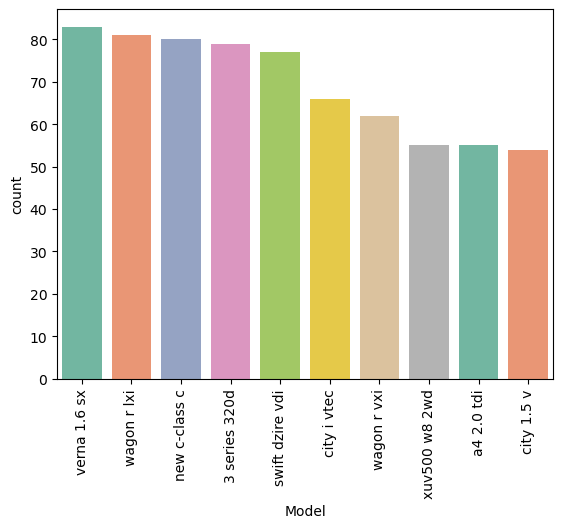

In [61]:
#COUNTER PLOT
for col in cat_cols:
    print(col)
    sns.countplot(x=col, data=df,order=df[col].value_counts().head(10).index, palette="Set2")
    plt.xticks(rotation=90)
    plt.ylabel('count')
    plt.show()

### **Observations**
- Highest number of car is Mahindra XUV500 W8 2WD follwed by Maruti Swift VDI and the least number of cars are Honda City 1.5 V MT and Honda Amaze S i-dtech.
- Mumbai has most number of cars followed by Hyderbad and Coimbatore and on the other hand Jaipur and Bangalore has least number of cars.
- Around 4000 cars are to be found diesel fuel type followed by nearly 3500 of them Petrol and rest with the lest are CNG nad LPG.
- Car with manual transmission are more compared to Automatic transmission.
- First hand cars around 6000 of them which is huge compared to second, third, fourth and above.
- Maruti followed by Hyundai has the highest number of brand.
- Verna 1.6 sx and wagon r lxi are most number of models. 

#### **Step 5B: Bivariate Analysis**


Bivariate analysis explores the relationship between two variables to understand their correlation and dependencies. It helps identify patterns, trends, and potential predictors for a target variable. For numerical data, it uses techniques like correlation analysis and scatter plots. For categorical data, it employs tests like the chi-square test or contingency tables. Mixed data types can be analyzed with tools like box plots or bar charts. Bivariate analysis is essential for identifying meaningful relationships and guiding further statistical or machine learning analysis.

#### **Location Analysis**

In [65]:
location_analysis = df.groupby('Location').agg({'Price':'mean'}).sort_values(by='Price', ascending=False).reset_index()


In [66]:
location_analysis.style.background_gradient(cmap='Greens')

,Location,Price
0,Coimbatore,13.394779
1,Bangalore,12.060487
2,Kochi,10.331591
3,Hyderabad,9.147611
4,Delhi,9.067359
5,Mumbai,8.774607
6,Ahmedabad,7.953029
7,Chennai,7.429573
8,Pune,6.551073
9,Jaipur,5.805778


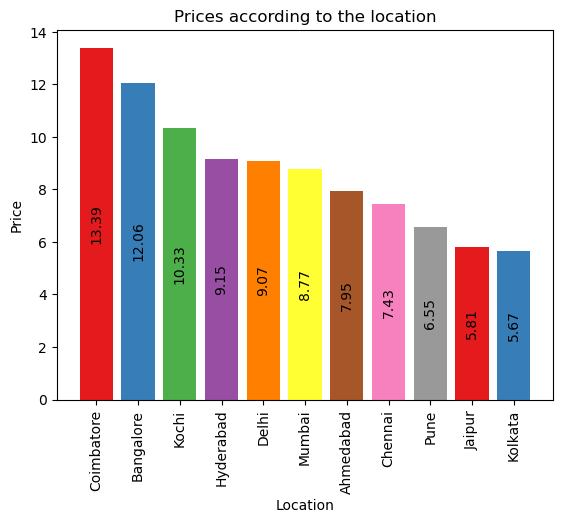

In [67]:
location = plt.bar(location_analysis['Location'], location_analysis['Price'], color=sns.color_palette('Set1'))
plt.bar_label(location,rotation=90, fmt = '%.2f', label_type='center')
plt.ticklabel_format(style='plain',axis='y')
plt.title('Prices according to the location')
plt.xlabel('Location')
plt.ylabel('Price')
plt.xticks(rotation=90)
plt.show()

### **Year wise analysis on Brand and Model**

In [69]:
Brand_model_by_year = df.groupby('Year').agg({'Brand':'count', 'Model':'count'}).sort_values(by='Brand', ascending=False).reset_index()
Brand_model_by_year

,Year,Brand,Model
0,2015,925,845
1,2014,923,818
2,2016,884,780
3,2013,790,687
4,2017,708,653
5,2012,679,563
6,2011,574,489
7,2010,401,326
8,2018,361,336
9,2009,247,198


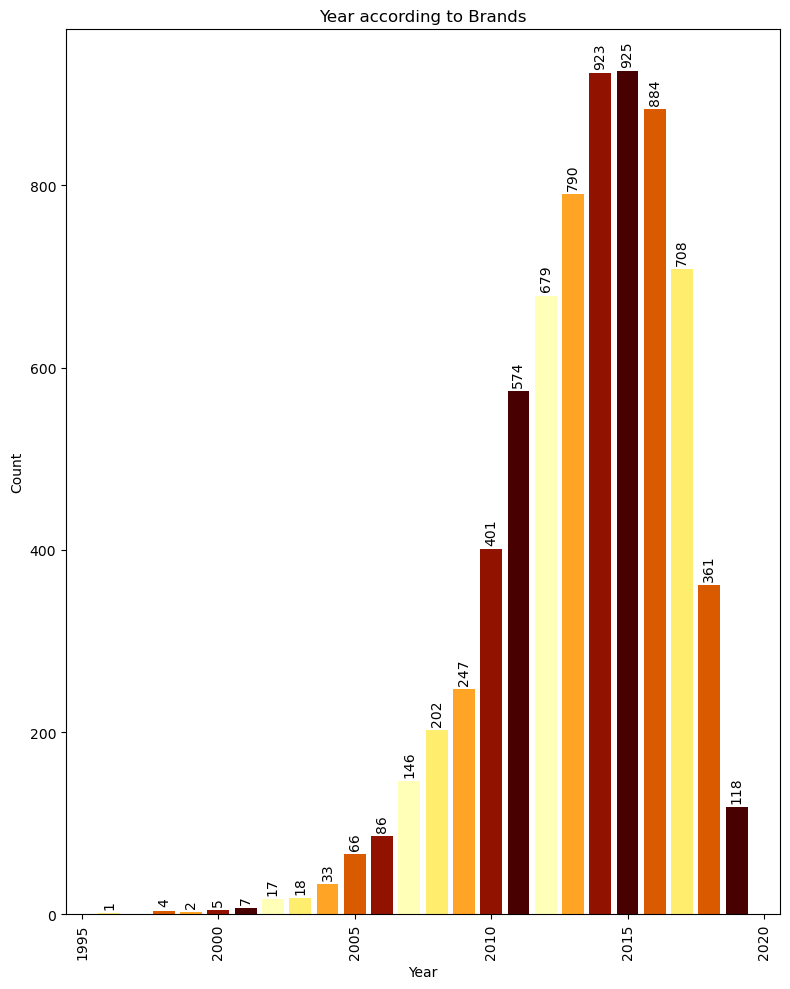

In [70]:
plt.figure(figsize=(8,10))
brand_model_by_year = plt.bar(Brand_model_by_year['Year'],Brand_model_by_year['Brand'], color=sns.color_palette('afmhot'))
plt.bar_label(brand_model_by_year ,rotation=90, fmt='%.f', label_type='edge', padding=3)
plt.ticklabel_format(style='plain',axis='y',)
plt.title('Year according to Brands')
plt.xlabel('Year')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

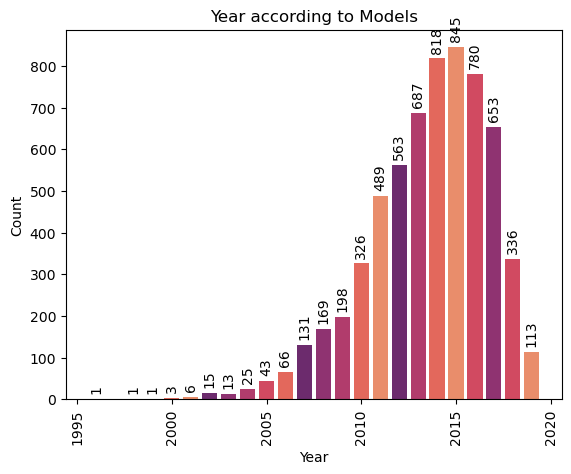

In [71]:
brand_model_by_year = plt.bar(Brand_model_by_year['Year'],Brand_model_by_year['Model'], color=sns.color_palette('flare'))
plt.bar_label(brand_model_by_year ,rotation=90, fmt='%.f', label_type='edge', padding=4)
plt.ticklabel_format(style='plain',axis='y')
plt.title('Year according to Models')
plt.xlabel('Year')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

### **Observation**
- Year 2015 had highest brand as well as models of nearly 925 and 845 brand and models respectively followed by 2014.
- In the year 1996 very low number of brands and models wer manufactured of one each.
- From year 1996 to 2002 the number of brands were vey low. And from 2010 there was an increase in the number.
- From year 1996 to 2001 the number of models were very low. And from 2010 there was an increase in the number.

### **Car_Age analysis on Brand and Model**

In [74]:
Brand_model_by_car_age = df.groupby('Car_Age').agg({'Brand':'count', 'Model':'count'}).sort_values(by='Car_Age', ascending=False).reset_index()
Brand_model_by_car_age

,Car_Age,Brand,Model
0,28,1,1
1,26,4,1
2,25,2,1
3,24,5,3
4,23,7,6
5,22,17,15
6,21,18,13
7,20,33,25
8,19,66,43
9,18,86,66


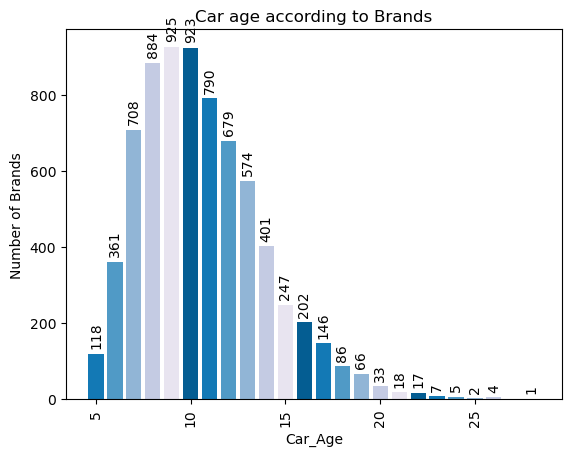

In [75]:
brand_model_by_car_age = plt.bar(Brand_model_by_car_age['Car_Age'],Brand_model_by_car_age['Brand'], color=sns.color_palette('PuBu'))
plt.bar_label(brand_model_by_car_age ,rotation=90, fmt='%.f', label_type='edge', padding=4)
plt.ticklabel_format(style='plain',axis='y')
plt.title('Car age according to Brands')
plt.xlabel('Car_Age')
plt.ylabel('Number of Brands')
plt.xticks(rotation=90)
plt.show()

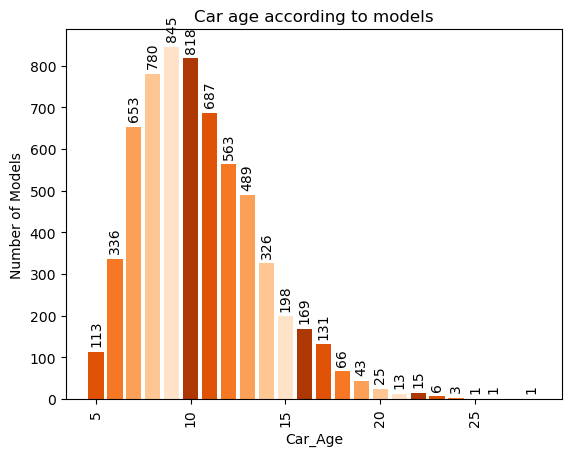

In [76]:
brand_model_by_car_age = plt.bar(Brand_model_by_car_age['Car_Age'],Brand_model_by_car_age['Model'], color=sns.color_palette('Oranges'))
plt.bar_label(brand_model_by_car_age ,rotation=90, fmt='%.f', label_type='edge', padding=4)
plt.ticklabel_format(style='plain',axis='y')
plt.title('Car age according to models')
plt.xlabel('Car_Age')
plt.ylabel('Number of Models')
plt.xticks(rotation=90)
plt.show()

### **Observation**
- It is known that higher the car age lesser the demand of a particular brand or model. 
- 800+ cars brands are at the age of 10 to 13 years.
- 600+ cars models are at the age of 10 to 12 years.
- At a moderate level car of age 5 to 10 are chosen.
- 23 to 28years had the least number of car brands and models.

### **Brand on Mileage Engine and Power analysis**

In [79]:
# Group by Brand and find the maximum values for Power, Engine, and Mileage
Brand_by_mileage = df.groupby('Brand').agg({'Power (bhp)':'max', 'Engine (CC)':'min', 'Mileage (Kmpl)':'max'}).sort_values(by='Mileage (Kmpl)').reset_index()
Brand_by_mileage

,Brand,Power (bhp),Engine (CC),Mileage (Kmpl)
0,Smart,0.00,799,0.00
1,Lamborghini,560.00,5204,6.40
2,Bentley,616.00,5998,10.20
3,Ambassador,35.50,1489,12.80
4,Isuzu,174.57,2499,13.80
5,Hindustan,0.00,1995,14.10
6,OpelCorsa,88.00,1389,14.20
7,Mitsubishi,199.30,1468,14.80
8,Force,139.07,2149,17.00
9,Jeep,170.00,1368,17.10


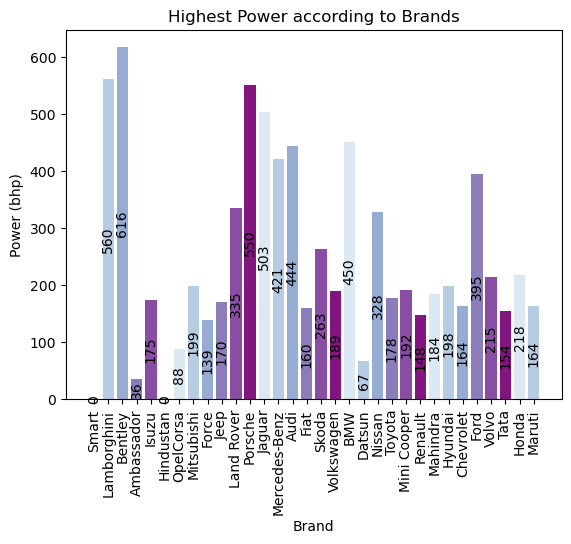

In [80]:
brand_by_mileage = plt.bar(Brand_by_mileage['Brand'], Brand_by_mileage['Power (bhp)'], color=sns.color_palette('BuPu'))
plt.bar_label(brand_by_mileage ,rotation=90, fmt='%.f', label_type='center')
plt.ticklabel_format(style='plain',axis='y')
plt.title('Highest Power according to Brands')
plt.xlabel('Brand')
plt.ylabel('Power (bhp)')
plt.xticks(rotation=90)
plt.show()

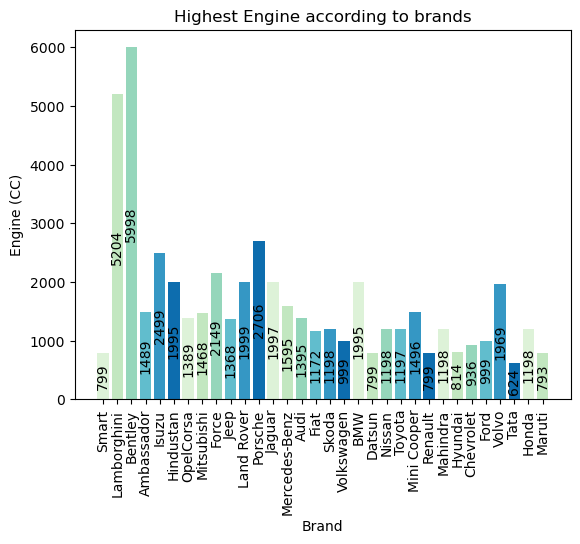

In [81]:
brand_by_mileage = plt.bar(Brand_by_mileage['Brand'], Brand_by_mileage['Engine (CC)'], color=sns.color_palette('GnBu'))
plt.bar_label(brand_by_mileage,rotation=90, fmt = '%.f', label_type='center')
plt.ticklabel_format(style='plain',axis='y')
plt.title('Highest Engine according to brands')
plt.xlabel('Brand')
plt.ylabel('Engine (CC)')
plt.xticks(rotation=90)
plt.show()

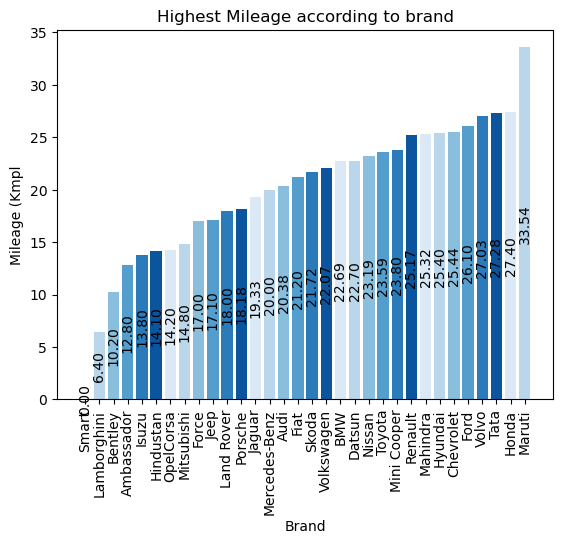

In [82]:
brand_by_mileage = plt.bar(Brand_by_mileage['Brand'], Brand_by_mileage['Mileage (Kmpl)'], color=sns.color_palette('Blues'))
plt.bar_label(brand_by_mileage ,rotation=90, fmt = '%.2f', label_type='center')
plt.ticklabel_format(style='plain',axis='y')
plt.title('Highest Mileage according to brand')
plt.xlabel('Brand')
plt.ylabel('Mileage (Kmpl')
plt.xticks(rotation=90)
plt.show()

### **Observation**
- Bently and Lamborgini has the highest power 616 bhp and 560 bhp respectively as well as highest engine capacity, but in mileage these two brand has the least mileage. From this we know that power and engine are inversly proportional to mileage.
- Ambassdor and Datsun has the least power.
- Tata and Hyundai has the least engine capacity.
- Maruti, Honda, Tata and may other gives the most mileage.

### **Price wise analysis**

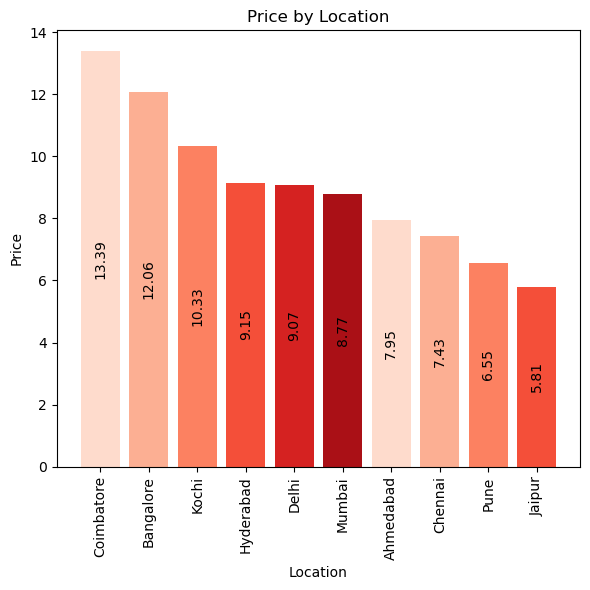

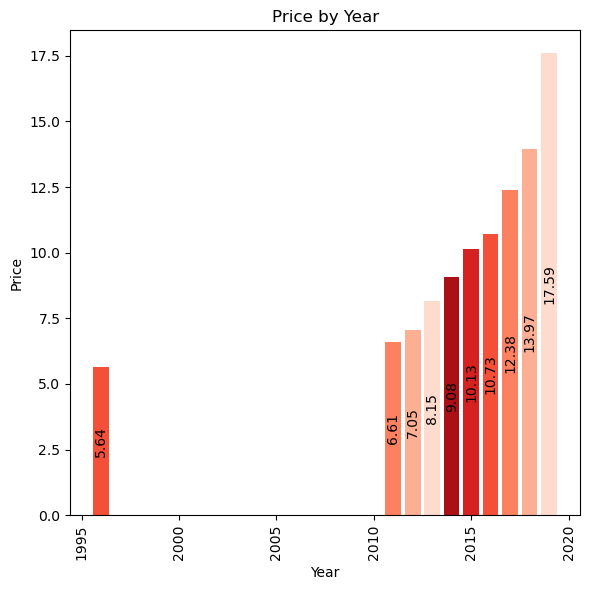

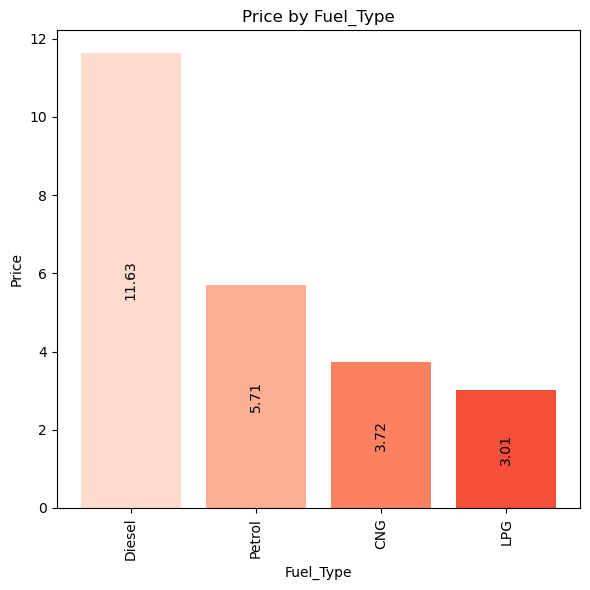

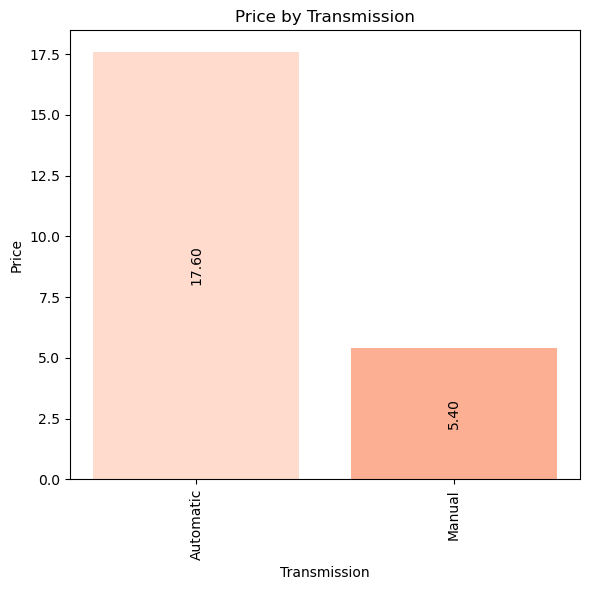

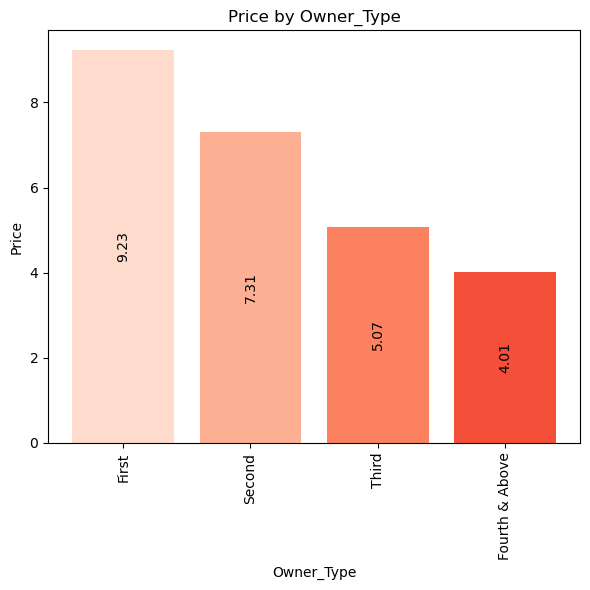

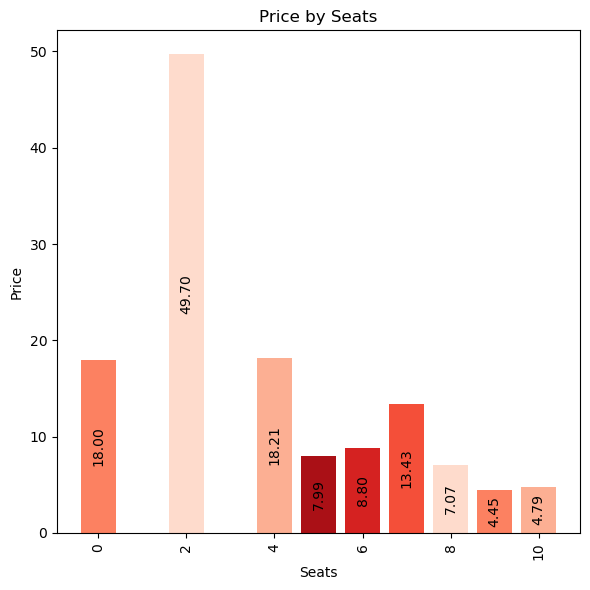

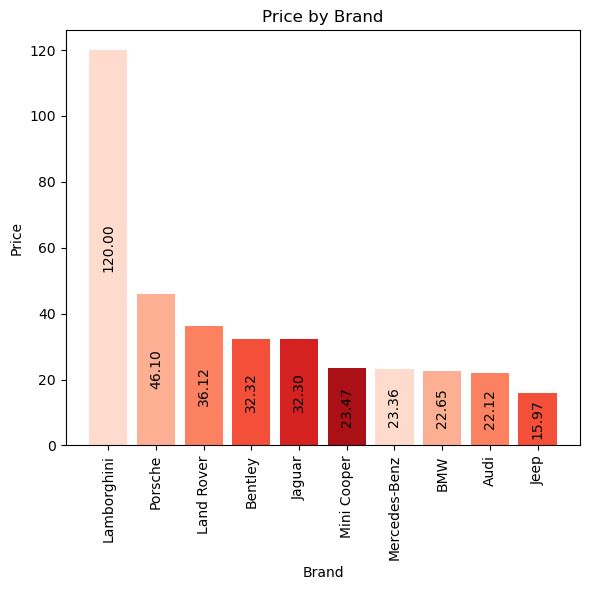

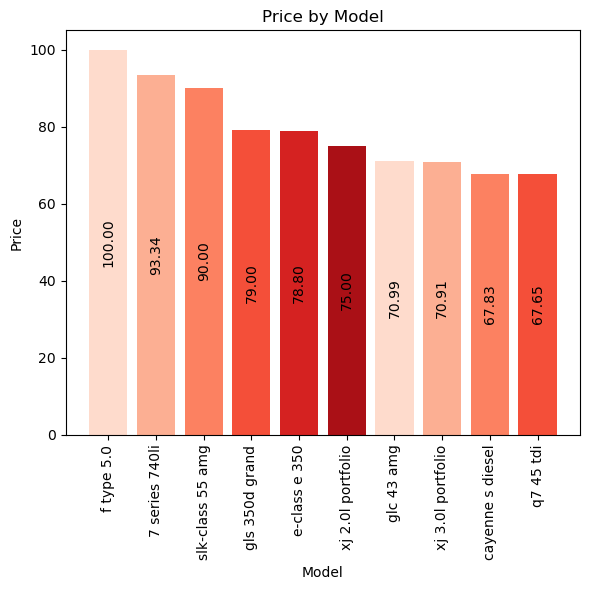

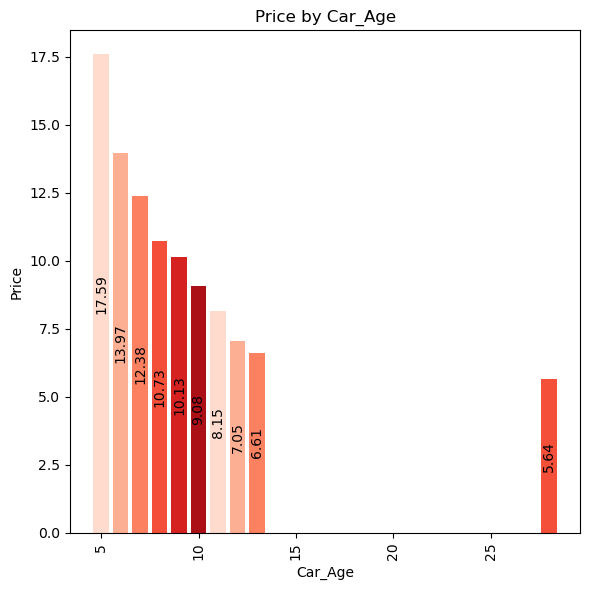

In [85]:
features = ['Location', 'Year', 'Fuel_Type',
       'Transmission', 'Owner_Type', 'Seats', 'Brand', 'Model', 'Car_Age']

results = {}

for feature in features:
    if feature in df.columns:  
        analysis = (
            df.groupby(feature)
            .agg({'Price': 'mean'})
            .sort_values(by='Price', ascending=False)
            .reset_index()
        )
        results[feature] = analysis
        top_analysis = analysis.head(10)
        plt.figure(figsize=(6, 6))
        bar_value = plt.bar(top_analysis[feature], top_analysis['Price'], color=sns.color_palette('Reds'))
        plt.bar_label(bar_value, label_type='center', fmt='%.2f', rotation=90)
        plt.xlabel(feature)
        plt.ylabel('Price')
        plt.title(f'Price by {feature}')
        plt.xticks(rotation=90)
        plt.tight_layout()
        plt.show()

### **Observation**
- Coimbatore has higest price followed by Bangalore and Kochi.
- The price of automatic cars are more compared to manual cars.
- The prices peaked in years between 2015 to 2020.
- Diesel cars price were more compared to Petrol, CNG, LPG. 
- The price of first owner type was more because its a brand new car followed by second hand, third hand and fouth & above.
- The sales of two seater cars were sold more followed by 4 and 6-8 ,and the least is 10 seater.
- The brand which has more price is Lamborghini followed by Porsche Land Rover and Bently.
- f type 5.0 was most sold model.
- The more sale of car happened with car age between 5 to 10 because lesser the age more newer it is to drive.
- The latest model cars are high in price.

### **Conclusion**
This analysis helps people to make a proper choice on the car thy have to buy,what is the price for a car to buy and which loaction sells the best cars, which seater is good, which fuel type is mostly bought and many more features which makes the buyers to make a reasonable choice according to their budget.